In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys; sys.path.append("..")
from src.utils import read_data

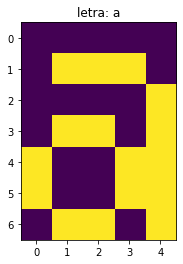

In [2]:
data_dict = read_data("../data/font.csv")

letra = "a"
plt.imshow(data_dict[letra])
plt.title("letra: " + letra)
plt.show()

In [3]:
from src.autoencoder import Autoencoder
from src.perceptron_multicapa import Layer

autoencoder = Autoencoder([
    Layer(35, 16, "sigmoid"),
    Layer(16, 16, "linear"),
    Layer(16, 2, "linear"),     # bottleneck
    Layer(2, 16, "linear"),
    Layer(16, 35, "sigmoid"),
], bottleneck_index=2)

X = np.array(list(data_dict.values()))
X = X.reshape(-1, 5 * 7)
history = autoencoder.train_autoencoder(X, epochs=1000, batch_size=10)

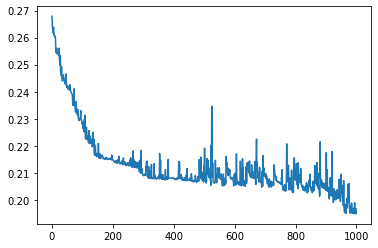

In [4]:
e = [h["epoch"] for h in history]
l = [h["train_loss"] for h in history]
plt.plot(e, l)
plt.show()

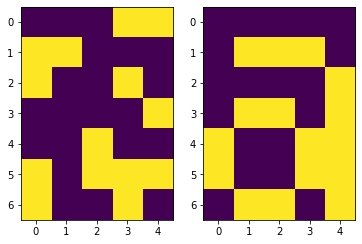

In [10]:
idx = 1
fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.round(autoencoder.forward(X[idx])).reshape(7, 5))
ax[1].imshow(X[idx].reshape(7, 5))
plt.show()